In [7]:
import os
print(os.getcwd())




/Users/juanpardo/premium-eda-agent/notebooks


In [2]:
#Carga de archivos asociados con eda_ventas_items para identificacion de datos de ventas en Premium Choice
from pathlib import Path
import pandas as pd

# Ruta base corregida desde notebooks/
ruta_base = Path("../data/raw")

archivos_items_ventas = [
    "ventas_dcto_items_2019.xlsx",
    "ventas_dcto_items_2020.xlsx",
    "ventas_dcto_items_2021.xlsx",
    "ventas_dcto_items_2022_1de3.xlsx",
    "ventas_dcto_items_2022_2de3.xlsx",
    "ventas_dcto_items_2022_3de3.xlsx",
    "ventas_dcto_items_2023_1de4.xlsx",
    "ventas_dcto_items_2023_2de4.xlsx",
    "ventas_dcto_items_2023_3de4.xlsx",
    "ventas_dcto_items_2023_4de4.xlsx",
    "ventas_dcto_items_2024_1de4.xlsx",
    "ventas_dcto_items_2024_2de4.xlsx",
    "ventas_dcto_items_2024_3de4.xlsx",
    "ventas_dcto_items_2024_4de4.xlsx",
    "ventas_dcto_items_2025.xlsx"
]

dfs_items = []

for nombre_archivo in archivos_items_ventas:
    path = ruta_base / nombre_archivo
    try:
        df_temp = pd.read_excel(path, engine="openpyxl")
        dfs_items.append(df_temp)
        print(f"✅ Cargado: {nombre_archivo} → shape {df_temp.shape}")
    except Exception as e:
        print(f"❌ Error cargando {nombre_archivo}: {e}")

if dfs_items:
    df_items_ventas = pd.concat(dfs_items, ignore_index=True)
    print(f"\n📊 DataFrame consolidado: shape {df_items_ventas.shape}")
else:
    print("⚠️ No se cargaron archivos correctamente.")


✅ Cargado: ventas_dcto_items_2019.xlsx → shape (1439, 22)
✅ Cargado: ventas_dcto_items_2020.xlsx → shape (2211, 22)
✅ Cargado: ventas_dcto_items_2021.xlsx → shape (2960, 22)
✅ Cargado: ventas_dcto_items_2022_1de3.xlsx → shape (58470, 22)
✅ Cargado: ventas_dcto_items_2022_2de3.xlsx → shape (61653, 22)
✅ Cargado: ventas_dcto_items_2022_3de3.xlsx → shape (65534, 22)
✅ Cargado: ventas_dcto_items_2023_1de4.xlsx → shape (46769, 22)
✅ Cargado: ventas_dcto_items_2023_2de4.xlsx → shape (49712, 22)
✅ Cargado: ventas_dcto_items_2023_3de4.xlsx → shape (49290, 22)
✅ Cargado: ventas_dcto_items_2023_4de4.xlsx → shape (58171, 22)
✅ Cargado: ventas_dcto_items_2024_1de4.xlsx → shape (41153, 22)
✅ Cargado: ventas_dcto_items_2024_2de4.xlsx → shape (44752, 22)
✅ Cargado: ventas_dcto_items_2024_3de4.xlsx → shape (43791, 22)
✅ Cargado: ventas_dcto_items_2024_4de4.xlsx → shape (55680, 22)
✅ Cargado: ventas_dcto_items_2025.xlsx → shape (50129, 22)

📊 DataFrame consolidado: shape (631714, 22)


In [3]:
#Inspeccion general del archivo de referencia en items de ventas en el historico de Premium Choice 
# Primeras filas
df_items_ventas.head()


,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,...,costo,utilidadps,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito
0,CL 100000001179,CORTES GARZON BLANCA JAZMIN,1 8262,2019-01-10,120692,MAESE 6 MESES X 150 GRS,-2.000,19,-22689.0,0.0,...,-14350.06,-8338.94,58.111,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,ALVARADO CARLOS,NaN
1,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156083,COLBY JACK X 3 KL APROX,-0.430,0,0.0,-26698.0,...,-12567.01,-14130.99,112.445,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN
2,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156079,MUENSTER X KL,-0.345,0,0.0,-14383.0,...,-8756.08,-5626.92,64.263,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN
3,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156077,MILD CHEDDARx X KL,-0.290,19,-18119.0,0.0,...,-10025.33,-8093.67,80.732,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,BODEGA PRINCIPAL,NaN
4,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8267,2019-01-15,156050,RICOTTA REGULARx15oz,-3.000,0,0.0,-36465.0,...,-23211.90,-13253.10,57.096,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN


In [4]:
#Informacion general del analisis de items de ventas de premium choice 
# Información general
df_items_ventas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631714 entries, 0 to 631713
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   cod_cliente               162009 non-null  object        
 1   cliente                   631714 non-null  object        
 2   documento                 631714 non-null  object        
 3   defecha                   631714 non-null  datetime64[ns]
 4   cod_articulo_servicio     631714 non-null  object        
 5   nombre_articulo_servicio  631714 non-null  object        
 6   cantidad                  631714 non-null  float64       
 7   porc_iva                  631714 non-null  int64         
 8   vrgravado                 631714 non-null  float64       
 9   vrnogravado               631714 non-null  float64       
 10  descuento                 631714 non-null  int64         
 11  subtotal                  631714 non-null  float64       
 12  co

Se realiza un análisis exploratorio para comprender el comportamiento general de los ítems de ventas históricos. El objetivo es obtener una visión agregada sobre los volúmenes de transacciones, diversidad de productos, frecuencia de clientes y cobertura temporal.

📊 Resultados destacados del describe:

Volumen de registros:
Se cuentan más de 631,000 transacciones registradas.
La columna cod_cliente aparece solo en ~162,000 registros, lo que podría indicar ventas anónimas o sin trazabilidad a cliente específico (e.g., mostrador o POS).
Clientes:
713 códigos de cliente únicos, donde el cliente más frecuente (CL 100000000398) concentra más de 57,000 registros.
Este comportamiento sugiere una alta dependencia comercial hacia ciertos compradores específicos.
Ventas por mostrador:
El cliente VENTA MOSTRADOR - P.O.S. representa una porción significativa del volumen con 469,705 registros, lo que evidencia la importancia de canales directos o sin registro nominativo.

In [5]:
#Estadisticas descriptivas asociadas con el comportamiento de los items de ventas a partir del historico para Premium Choice 
# Estadísticas descriptivas
df_items_ventas.describe(include='all')


,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,...,costo,utilidadps,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito
count,162009,631714,631714,631714,631714,631714,631714.000000,631714.000000,6.317140e+05,6.317140e+05,...,6.317140e+05,6.317140e+05,6.317140e+05,631714,631466,631466,631714.0,631467.000000,630634,278114
unique,713,714,201735,NaN,2753,2475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,23,23,NaN,NaN,41,1
top,CL 100000000398,VENTA MOSTRADOR - P.O.S.,1PCH 26393,NaN,.COPEO,COPEO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,F.POS,4135 95 19,INGRESOS GRAVADOS POS AL 19%,NaN,NaN,VENDEDOR MOSTRADOR - P.O.S.,INSTITUCIONAL
freq,57026,469705,88,NaN,9826,9826,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,469705,245369,245369,NaN,NaN,151064,278114
mean,NaN,NaN,NaN,2023-08-16 19:34:34.276650496,NaN,NaN,3.693203,14.163181,7.801386e+04,7.828154e+03,...,4.681123e+04,3.885956e+04,3.512191e+02,NaN,NaN,NaN,0.0,10.855780,NaN,NaN
min,NaN,NaN,NaN,2019-01-10 00:00:00,NaN,NaN,-3600.000000,0.000000,-2.134450e+07,-2.300000e+07,...,-1.453689e+07,-2.300000e+07,-9.997600e+01,NaN,NaN,NaN,0.0,1.000000,NaN,NaN
25%,NaN,NaN,NaN,2022-11-02 00:00:00,NaN,NaN,1.000000,8.000000,7.870370e+03,0.000000e+00,...,4.111170e+03,4.658370e+03,5.142100e+01,NaN,NaN,NaN,0.0,1.000000,NaN,NaN
50%,NaN,NaN,NaN,2023-08-23 00:00:00,NaN,NaN,1.000000,19.000000,1.899227e+04,0.000000e+00,...,1.016875e+04,1.086327e+04,8.791400e+01,NaN,NaN,NaN,0.0,4.000000,NaN,NaN
75%,NaN,NaN,NaN,2024-06-14 00:00:00,NaN,NaN,2.000000,19.000000,5.325900e+04,0.000000e+00,...,3.449496e+04,3.049134e+04,1.368820e+02,NaN,NaN,NaN,0.0,4.000000,NaN,NaN
max,NaN,NaN,NaN,2025-04-30 00:00:00,NaN,NaN,1934.000000,19.000000,3.704760e+07,2.300000e+08,...,2.099328e+07,2.300000e+08,1.785614e+06,NaN,NaN,NaN,0.0,53.000000,NaN,NaN


In [6]:
#Revision de nombres de columnas e informacion de valores nulos de los articulos de ventas de premium choice 
# Revisar nombres de columnas
df_items_ventas.columns.tolist()


['cod_cliente',
 'cliente',
 'documento',
 'defecha',
 'cod_articulo_servicio',
 'nombre_articulo_servicio',
 'cantidad',
 'porc_iva',
 'vrgravado',
 'vrnogravado',
 'descuento',
 'subtotal',
 'costo',
 'utilidadps',
 'utilidadpc',
 'tipodocumento',
 'cuenta',
 'nomcuenta',
 'icolicoresunitario',
 'bodega',
 'vendedor',
 'distrito']

In [7]:
#Identificacion de valores unicos asociados por columna a partir del historico de items de ventas para premium choice 
# Valores únicos por columna (útil para entender IDs, categorías, fechas)
for col in df_items_ventas.columns:
    print(f"{col}: {df_items_ventas[col].nunique()} valores únicos")



cod_cliente: 713 valores únicos
cliente: 714 valores únicos
documento: 201735 valores únicos
defecha: 1698 valores únicos
cod_articulo_servicio: 2753 valores únicos
nombre_articulo_servicio: 2475 valores únicos
cantidad: 4244 valores únicos
porc_iva: 5 valores únicos
vrgravado: 63096 valores únicos
vrnogravado: 9125 valores únicos
descuento: 1012 valores únicos
subtotal: 70503 valores únicos
costo: 109058 valores únicos
utilidadps: 155886 valores únicos
utilidadpc: 35319 valores únicos
tipodocumento: 5 valores únicos
cuenta: 23 valores únicos
nomcuenta: 23 valores únicos
icolicoresunitario: 1 valores únicos
bodega: 9 valores únicos
vendedor: 41 valores únicos
distrito: 1 valores únicos


In [8]:
#Validacion de nulos 
# Valores nulos por columna
df_items_ventas.isnull().sum()


cod_cliente                 469705
cliente                          0
documento                        0
defecha                          0
cod_articulo_servicio            0
nombre_articulo_servicio         0
cantidad                         0
porc_iva                         0
vrgravado                        0
vrnogravado                      0
descuento                        0
subtotal                         0
costo                            0
utilidadps                       0
utilidadpc                       0
tipodocumento                    0
cuenta                         248
nomcuenta                      248
icolicoresunitario               0
bodega                         247
vendedor                      1080
distrito                    353600
dtype: int64

In [9]:
#Identificacion asociada a los duplicados de las columnas 
# Duplicados
df_items_ventas.duplicated().sum()


4962

In [10]:
#Conversion de tipos de datos clave
cols_to_str = ['cod_cliente', 'cod_articulo_servicio', 'documento']
df_items_ventas[cols_to_str] = df_items_ventas[cols_to_str].astype(str)


In [11]:
#Validacion de los rangos de fecha presentados de los datos
df_items_ventas['defecha'] = pd.to_datetime(df_items_ventas['defecha'])
print(df_items_ventas['defecha'].min(), df_items_ventas['defecha'].max())


2019-01-10 00:00:00 2025-04-30 00:00:00


Hallazgos clave:

Algunos artículos con códigos atípicos (e.g., ..2023, .50) presentan valores de utilidad altos, pero no tienen utilidad por unidad (utilidadpc = 0.0), lo que sugiere posibles errores de codificación o agrupación de descuentos/globales.
Entre los productos con mayor utilidad promedio por unidad, destacan:
Código 123496 con más de $422 por unidad, siendo uno de los artículos más rentables.
Código 123495 con más de $100 por unidad.
Códigos 121050, 121079 y 122373 también presentan utilidades promedio por unidad superiores a $60.

Estos productos son candidatos ideales para priorizar en campañas promocionales o aumentar su presencia en el canal de ventas.
Conviene auditar los códigos con utilidad total alta pero utilidadpc = 0 para validar si son válidos o representan acumulaciones erróneas.
El análisis puede ampliarse cruzando esta rentabilidad con volumen de ventas o frecuencia de compra para una priorización más precisa.

Se realiza un análisis exploratorio para comprender el comportamiento general de los ítems de ventas históricos. El objetivo es obtener una visión agregada sobre los volúmenes de transacciones, diversidad de productos, frecuencia de clientes y cobertura temporal.

📊 Resultados destacados del describe:

Volumen de registros:
Se cuentan más de 631,000 transacciones registradas.
La columna cod_cliente aparece solo en ~162,000 registros, lo que podría indicar ventas anónimas o sin trazabilidad a cliente específico (e.g., mostrador o POS).
Clientes:
713 códigos de cliente únicos, donde el cliente más frecuente (CL 100000000398) concentra más de 57,000 registros.
Este comportamiento sugiere una alta dependencia comercial hacia ciertos compradores específicos.
Ventas por mostrador:
El cliente VENTA MOSTRADOR - P.O.S. representa una porción significativa del volumen con 469,705 registros, lo que evidencia la importancia de canales directos o sin registro nominativo.

In [12]:
#Identificacion de los 10 primeros articulos con mayor utilidad promedi por unidad vendida 
#Agrupacion por el codigo del articulo para la identificacion de los productos mas rentables
df_items_ventas.groupby('cod_articulo_servicio')[['utilidadps', 'utilidadpc']] \
    .mean().sort_values('utilidadps', ascending=False).head(10)






,utilidadps,utilidadpc
cod_articulo_servicio,,
..2023,7.144071e+07,0.00000
.50,9.594673e+06,0.00000
...2024,5.500000e+06,0.00000
121079,3.394304e+06,65.20400
122373,2.177114e+06,60.71600
121050,1.704264e+06,65.21150
122646,1.317145e+06,58.12420
123496,1.081447e+06,422.05925
100458,1.060000e+06,46.28800


In [13]:
#Top de los articulos con mayor nivel de utilidad total (no solamente a partir del promedio)
df_items_ventas.groupby('cod_articulo_servicio')['utilidadps'].sum().sort_values(ascending=False).head(10)




cod_articulo_servicio
101039    1.451405e+09
101055    1.284201e+09
101052    6.435805e+08
156077    5.179961e+08
..2023    5.000850e+08
101056    4.874847e+08
.COPEO    4.649703e+08
159005    4.281252e+08
101057    3.872917e+08
121603    3.813194e+08
Name: utilidadps, dtype: float64

In [14]:
#Identificacion del top de los articulos por el volumen vendido 
df_items_ventas.groupby('cod_articulo_servicio')['cantidad'].sum().sort_values(ascending=False).head(10)


cod_articulo_servicio
101039    173026.0
101055    152796.0
101052     78277.0
101056     60419.0
159005     52178.0
101096     47698.0
101057     47012.0
150174     44325.0
101062     42976.0
101053     40974.0
Name: cantidad, dtype: float64

In [15]:
#Relacion utilidad por unidad/costo
df_items_ventas['ratio_utilidad_costo'] = df_items_ventas['utilidadps'] / df_items_ventas['costo']


In [16]:
#Representacion del top de clientes por utilidad total 
#Identificacion de los clientes mas valiiosos
df_items_ventas.groupby('cliente')['utilidadps'].sum().sort_values(ascending=False).head(10)


cliente
CENCOSUD COLOMBIA S.A.        6.368798e+09
VENTA MOSTRADOR - P.O.S.      6.145864e+09
ALMACENES EXITO S A           2.289803e+09
SUPERTIENDAS CA—AVERAL SAS    1.131962e+09
INVERSIONES EURO S. A.        7.480452e+08
SUPER A LIMITADA              5.133692e+08
FARMATODO COLOMBIA S.A.       3.506908e+08
AMORE GROUP S.A.S.            3.500322e+08
MERA EL DORADO S.A.S.         3.376965e+08
DLK S.A.S.                    2.845482e+08
Name: utilidadps, dtype: float64

In [17]:
#Análisis de devoluciones y ventas negativas 
#Porcentaje de clientes que cuenta con registros negativos 
(df_items_ventas['cantidad'] < 0).mean()


0.020615341752755204

In [18]:
#Articulos más devueltos (por cantidad negativa)
df_items_ventas[df_items_ventas['cantidad'] < 0] \
    .groupby('cod_articulo_servicio')['cantidad'].sum().sort_values().head(10)


cod_articulo_servicio
          101039   -4637.0
          101055   -3692.0
158998             -3600.0
          159005   -3026.9
158998.0           -2400.0
          101052   -2131.0
          121603   -1795.0
          101056   -1698.0
          101096   -1673.0
          101057   -1513.0
Name: cantidad, dtype: float64

Este gráfico muestra la evolución mensual de la cantidad total de unidades vendidas, lo que permite identificar patrones estacionales, periodos de crecimiento o caídas en las ventas.

🧮 Metodología:

Se generó una nueva columna año_mes a partir de la fecha (defecha), redondeada al mes.
Se agruparon los datos por mes (año_mes) y se calculó la suma total de unidades vendidas (cantidad) en cada mes.
Se graficó la evolución temporal de las ventas mensuales.
📊 Observaciones clave:

A partir de inicios de 2022 se observa un cambio brusco en el comportamiento de las ventas, pasando de volúmenes bajos/cero a una curva con picos mensuales superiores a 60.000 unidades.
El año 2023 muestra variabilidad con varios meses de alta demanda, aunque no se mantiene una tendencia de crecimiento sostenido.
En 2024 se mantienen los volúmenes, aunque con algunas caídas notables.
El pico más alto se presenta cerca de finales de 2024 o inicios de 2025, superando las 100.000 unidades en un solo mes.

<Axes: xlabel='año_mes'>

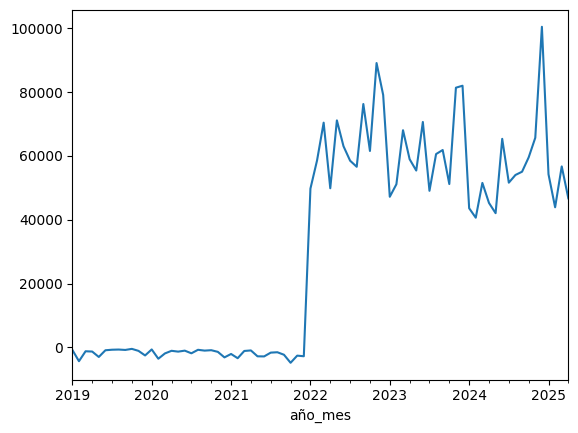

In [19]:
#Tendencias de ventas mensuales/anuales
#Analisis temporal para identificar los articulos que suben o bajan en utilidad con el tiempo
df_items_ventas['año_mes'] = df_items_ventas['defecha'].dt.to_period('M')
df_items_ventas.groupby('año_mes')['cantidad'].sum().plot()


In [20]:
#Comparacion de utilidad por bodega 
df_items_ventas.groupby('bodega')['utilidadps'].sum().sort_values(ascending=False)


bodega
1.0     1.849377e+10
4.0     2.595292e+09
52.0    1.961050e+09
2.0     9.426349e+08
12.0    5.772962e+08
50.0    7.974479e+07
3.0     4.122443e+06
44.0    1.011237e+05
53.0   -5.064678e+05
Name: utilidadps, dtype: float64

In [38]:
#Deteccion de bodegas con productos no rentables 
df_items_ventas[df_items_ventas['utilidadps'] < 0].groupby('bodega').size()


bodega
1.0     12047
2.0      3206
3.0        24
4.0      4274
12.0     1036
50.0      487
52.0     3155
53.0        9
dtype: int64

In [39]:
#Detección de anomalias 
#Precios fuera del rango o que presentan un nivel de inconsistencias 
df_items_ventas[df_items_ventas['costo'] <= 0]


,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,...,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito,ratio_utilidad_costo,año_mes
0,CL 100000001179,CORTES GARZON BLANCA JAZMIN,1 8262,2019-01-10,120692,MAESE 6 MESES X 150 GRS,-2.000,19,-22689.0,0.0,...,58.111,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,ALVARADO CARLOS,NaN,0.581108,2019-01
1,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156083,COLBY JACK X 3 KL APROX,-0.430,0,0.0,-26698.0,...,112.445,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,1.124451,2019-01
2,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156079,MUENSTER X KL,-0.345,0,0.0,-14383.0,...,64.263,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,0.642630,2019-01
3,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156077,MILD CHEDDARx X KL,-0.290,19,-18119.0,0.0,...,80.732,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,BODEGA PRINCIPAL,NaN,0.807322,2019-01
4,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8267,2019-01-15,156050,RICOTTA REGULARx15oz,-3.000,0,0.0,-36465.0,...,57.096,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,0.570961,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631709,CL 100000000398,CENCOSUD COLOMBIA S.A.,1NCR 4967,2025-04-28,123226,EMBORG. GRUY…RE X 170G,-7.000,19,-272881.0,0.0,...,115.982,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,BODEGA PRINCIPAL,NaN,NaN,2025-04
631710,CL 100000001865,ZOG SAS,1NCR 4973,2025-04-29,121688,PARMESANO RUEDA GRAN SPICCO X KL,-2.200,19,-127600.0,0.0,...,0.000,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,PELAEZ PARRA CLAUDIA,NaN,NaN,2025-04
631711,CL 100000001865,ZOG SAS,1NCR 4974,2025-04-29,121688,PARMESANO RUEDA GRAN SPICCO X KL,-1.900,19,-110200.0,0.0,...,0.000,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,PELAEZ PARRA CLAUDIA,NaN,NaN,2025-04
631712,CL 100000000398,CENCOSUD COLOMBIA S.A.,1NCR 4975,2025-04-30,150179,ILE DE FRANCE CAMEMBERT X 125 GR,-4.000,19,-89068.0,0.0,...,98.269,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,BODEGA PRINCIPAL,NaN,NaN,2025-04


In [40]:
#Deteccion de anomalias 
#Ventas con representacion de utilidad negativa 
df_items_ventas[df_items_ventas['utilidadps'] < 0].head()


,cod_cliente,cliente,documento,defecha,cod_articulo_servicio,nombre_articulo_servicio,cantidad,porc_iva,vrgravado,vrnogravado,...,utilidadpc,tipodocumento,cuenta,nomcuenta,icolicoresunitario,bodega,vendedor,distrito,ratio_utilidad_costo,año_mes
0,CL 100000001179,CORTES GARZON BLANCA JAZMIN,1 8262,2019-01-10,120692,MAESE 6 MESES X 150 GRS,-2.000,19,-22689.0,0.0,...,58.111,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,ALVARADO CARLOS,NaN,0.581108,2019-01
1,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156083,COLBY JACK X 3 KL APROX,-0.430,0,0.0,-26698.0,...,112.445,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,1.124451,2019-01
2,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156079,MUENSTER X KL,-0.345,0,0.0,-14383.0,...,64.263,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,0.642630,2019-01
3,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8266,2019-01-15,156077,MILD CHEDDARx X KL,-0.290,19,-18119.0,0.0,...,80.732,D.COMER,4175 95 39,DEVOLUCION EN VENTAS COMERCIAL AL 19%,0,1.0,BODEGA PRINCIPAL,NaN,0.807322,2019-01
4,CL 100000000398,CENCOSUD COLOMBIA S.A.,1 8267,2019-01-15,156050,RICOTTA REGULARx15oz,-3.000,0,0.0,-36465.0,...,57.096,D.COMER,4175 95 25,DEVOLUCIONES NO GRAVADAS COMERCIAL,0,1.0,BODEGA PRINCIPAL,NaN,0.570961,2019-01


In [41]:
#Deteccion de anomalias 
#Registros que presentan duplicados que impactan la utilidad 
df_items_ventas[df_items_ventas.duplicated()].shape


(4962, 24)

<Axes: title={'center': 'Utilidad Total por Año'}, xlabel='Año', ylabel='Utilidad Total'>

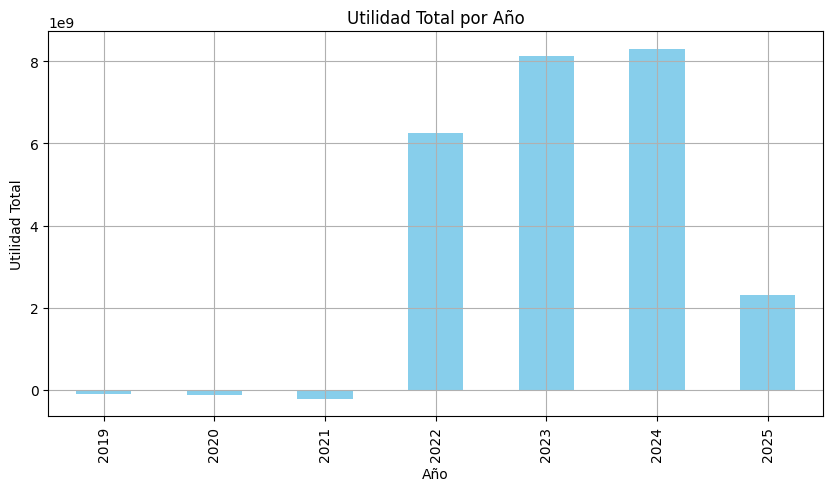

In [45]:
#Tendencia temporal de la utilidad total por mes y por año
# Asegúrate de que la columna de fecha esté en formato datetime
df_items_ventas['defecha'] = pd.to_datetime(df_items_ventas['defecha'])

# Crear columna de año
df_items_ventas['año'] = df_items_ventas['defecha'].dt.year

# Visualización
df_items_ventas.groupby('año')['utilidadps'].sum().plot(
    kind='bar',
    title='Utilidad Total por Año',
    ylabel='Utilidad Total',
    xlabel='Año',
    figsize=(10,5),
    grid=True,
    color='skyblue'
)


Este gráfico presenta los 10 artículos que han generado mayores pérdidas acumuladas a lo largo del histórico de ventas.

🧮 Metodología:

Se agruparon los datos por código de artículo (cod_articulo_servicio).
Se sumó la columna utilidadps (utilidad por unidad vendida) para obtener la utilidad total acumulada por producto.
Se ordenaron los artículos por utilidad total en orden ascendente (de mayor pérdida a menor) y se seleccionaron los 10 con peor desempeño.
Se visualizó el resultado con un gráfico de barras horizontales para facilitar la lectura comparativa.
📊 Observaciones clave:

Algunos artículos presentan pérdidas superiores a 60 millones, lo que podría representar errores en precios de venta, descuentos excesivos o sobrecostos de adquisición.
Aparece una categoría marcada como "SIN ARTÍCULO", que acumula la mayor pérdida absoluta. Este dato debe revisarse, ya que puede deberse a inconsistencias en el registro o ausencia de mapeo del SKU.
Artículos como 122811, 122814 y 122813 están asociados a pérdidas recurrentes y deberían ser auditados con urgencia.

<Axes: title={'center': 'Top 10 Artículos con Pérdida Total Acumulada'}, xlabel='Utilidad Total', ylabel='Código Artículo'>

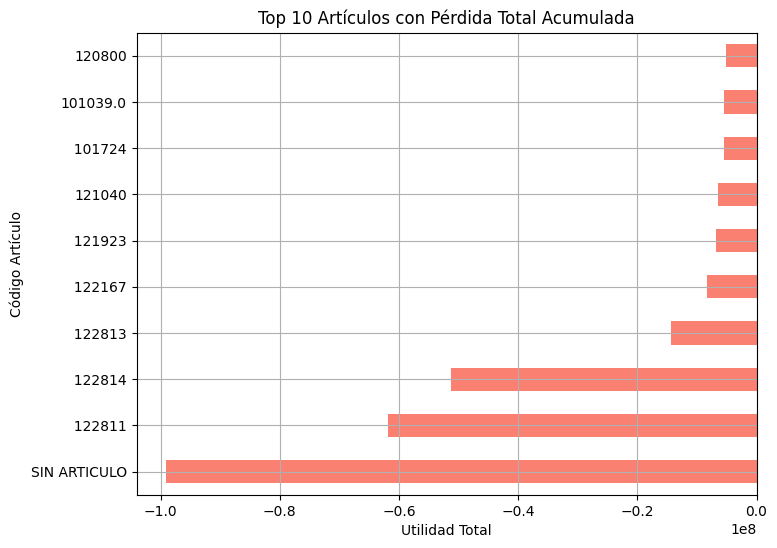

In [47]:
#Top 10 de los articulos con perdida total acumulada 
# Filtrar artículos con utilidad negativa y ordenarlos
df_items_ventas.groupby('cod_articulo_servicio')['utilidadps'] \
    .sum().sort_values().head(10).plot(
    kind='barh',
    title='Top 10 Artículos con Pérdida Total Acumulada',
    xlabel='Utilidad Total',
    ylabel='Código Artículo',
    color='salmon',
    figsize=(8,6),
    grid=True
)


Este gráfico muestra los 10 clientes que han generado la mayor utilidad total a lo largo del histórico de ventas.

🧮 Metodología:

Se agruparon las ventas por nombre del cliente (cliente).
Se sumó la columna utilidadps (utilidad por unidad vendida) para calcular la utilidad total generada por cada cliente.
Se ordenaron en orden descendente y se seleccionaron los 10 principales.
Se visualizó el resultado con un gráfico de barras horizontales para una lectura clara y comparativa.
📊 Observaciones clave:

CENCOSUD COLOMBIA S.A. y VENTA MOSTRADOR - P.O.S. lideran por amplio margen, generando utilidades significativamente superiores al resto.
Hay una alta concentración de utilidad en pocos clientes, lo que refuerza la importancia estratégica de mantener relaciones comerciales sólidas con estos actores.
Clientes como ALMACENES EXITO S A y SUPERTIENDAS CA—AVERAL SAS también representan una base sólida de rentabilidad

<Axes: title={'center': 'Top 10 Clientes por Utilidad Generada'}, xlabel='Utilidad Total', ylabel='Cliente'>

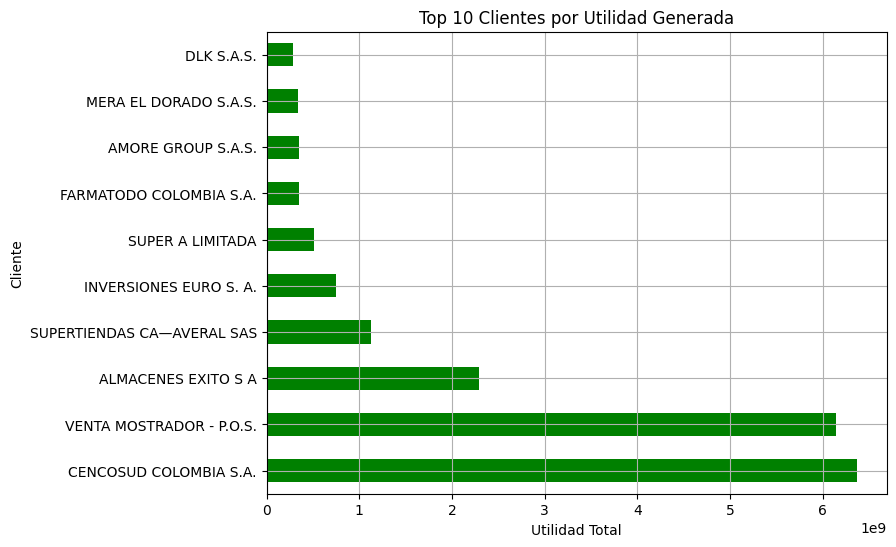

In [48]:
#Top 10 clientes por utilidad generada
# Agrupar por cliente y ordenar por utilidad total
df_items_ventas.groupby('cliente')['utilidadps'] \
    .sum().sort_values(ascending=False).head(10).plot(
    kind='barh',
    title='Top 10 Clientes por Utilidad Generada',
    xlabel='Utilidad Total',
    ylabel='Cliente',
    color='green',
    figsize=(8,6),
    grid=True
)


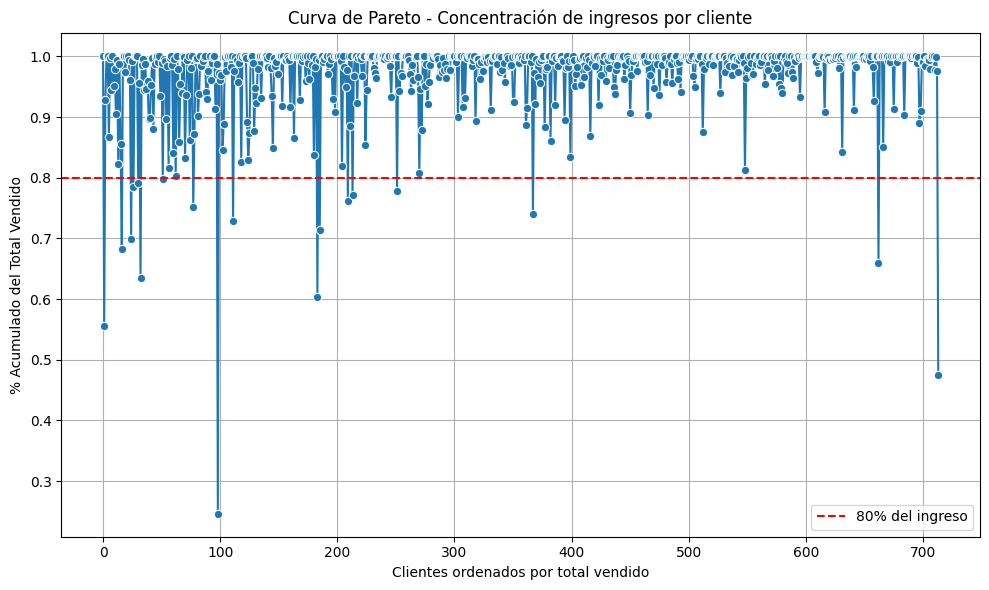

🔍 El 80% del ingreso proviene de 18 clientes de un total de 714.


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por cliente y calcular total vendido
ventas_por_cliente = df_items_ventas.groupby('cod_cliente')['subtotal'].sum().reset_index()
ventas_por_cliente.columns = ['cod_cliente', 'total_vendido']

# 2. Ordenar de mayor a menor
ventas_por_cliente = ventas_por_cliente.sort_values('total_vendido', ascending=False)

# 3. Calcular porcentaje del total y acumulado
ventas_por_cliente['porcentaje'] = ventas_por_cliente['total_vendido'] / ventas_por_cliente['total_vendido'].sum()
ventas_por_cliente['porcentaje_acumulado'] = ventas_por_cliente['porcentaje'].cumsum()

# 4. Visualizar curva de Pareto (Lorenz)
plt.figure(figsize=(10,6))
sns.lineplot(data=ventas_por_cliente, x=ventas_por_cliente.index, y='porcentaje_acumulado', marker='o')
plt.axhline(0.8, color='red', linestyle='--', label='80% del ingreso')
plt.title('Curva de Pareto - Concentración de ingresos por cliente')
plt.xlabel('Clientes ordenados por total vendido')
plt.ylabel('% Acumulado del Total Vendido')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Identificar cuántos clientes hacen el 80% del ingreso
clientes_80 = ventas_por_cliente[ventas_por_cliente['porcentaje_acumulado'] <= 0.80]
print(f"🔍 El 80% del ingreso proviene de {len(clientes_80)} clientes de un total de {ventas_por_cliente.shape[0]}.")


In [22]:
clientes_80[['cod_cliente', 'total_vendido']].head(10)


,cod_cliente,total_vendido
98,CL 100000000398,1.331342e+10
713,nan,1.237009e+10
1,CL 10003,4.427674e+09
183,CL 100000001067,2.549564e+09
32,CL 10451,1.691803e+09
662,CL 200000000365,1.336240e+09
16,CL 10292,1.209148e+09
24,CL 10351,9.481164e+08
185,CL 100000001069,8.105992e+08
111,CL 100000000502,7.448208e+08


/var/folders/fl/4p9gdc5d3wj63rppd6xjpnmh0000gn/T/ipykernel_2269/2926820212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='total_vendido', y='cod_cliente', palette='Blues_r')


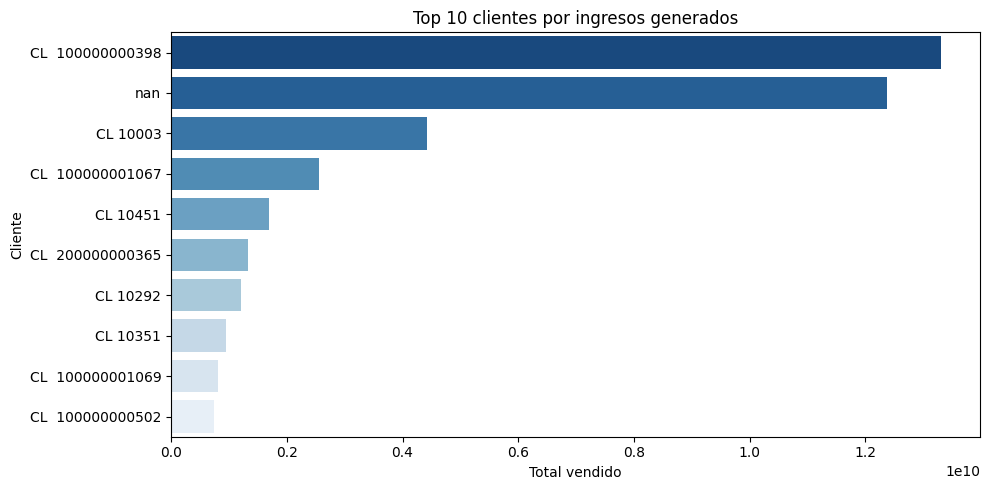

In [23]:
top10 = ventas_por_cliente.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top10, x='total_vendido', y='cod_cliente', palette='Blues_r')
plt.title('Top 10 clientes por ingresos generados')
plt.xlabel('Total vendido')
plt.ylabel('Cliente')
plt.tight_layout()
plt.show()
